In [1]:
import pandas as pd
import os

In [2]:
# inputs
main_dir = "CNBCtelevision"
ner_mapped = "mapped_gemma"
parent_dir = os.path.dirname(os.getcwd())

In [3]:
df_1 = pd.DataFrame()
for filename in os.listdir(os.path.join(main_dir, ner_mapped)):

    df_new = pd.read_csv(os.path.join(main_dir, ner_mapped, filename))
    df_new = df_new.loc[pd.notnull(df_new['Company_name_mapped'])]
    df_1  = pd.concat([df_1, df_new], axis=0)

df_1 ['u3_num'] = df_1 ['u3_num'].astype(int).astype(str)

In [4]:
# EDA on the video data collected from the channel
df_3 = pd.read_csv(os.path.join(parent_dir, "channel_scraper", f"{main_dir}_DB.csv"))
df_3['date_published'] = pd.to_datetime(df_3['date_published'], format='%Y-%m-%dT%H:%M:%SZ') 
print(f"Total videos: {len(df_3)}")
df_3.groupby(df_3.date_published.dt.year)['vid_id'].count()

Total videos: 104713


date_published
2018    10461
2019    18032
2020    18211
2021    19115
2022    18115
2023    16649
2024     4130
Name: vid_id, dtype: int64

In [5]:
df_1

,vid_id,company_found_gemma,Company_name_mapped,u3_num
0,1Ep2zVpKoik,Qualcomm (Technology),QUALCOMM Inc,31384
1,1Ep2zVpKoik,Tom (Not specified),TOM Group Ltd,17316
2,1Ep2zVpKoik,Federal Reserve (Central bank),Federal Bank Ltd,7212
3,1Ep2zVpKoik,China (Government),China Hongqiao Group Ltd,92909
4,1Ep2zVpKoik,UK (Government),UK Mortgages Ltd,191995
...,...,...,...,...
27,WowNTbDCJk8,Lift (Technology),Lift-A-Loft Corp,36572
28,WowNTbDCJk8,Tesla (Automotive),Tesla Inc,34277
29,WowNTbDCJk8,Uber (Transportation Network),Uber Technologies Inc,201282
30,WowNTbDCJk8,Chipotle (Restaurant),Chipotle Mexican Grill Inc,45411


In [6]:
df_1.loc[df_1['company_found_gemma'].str.contains("American A")]

,vid_id,company_found_gemma,Company_name_mapped,u3_num
6,-5dtCMELB-M,American Airlines (Airline),American Airlines Group Inc,27053
26,Oq3tuK__h1k,American Airlines (Airline),American Airlines Group Inc,27053
26,Swtfs2omrJY,American Airlines - Airline,American Airlines Group Inc,27053
20,e0PbY_6Ti4I,American Airlines (Airline),American Airlines Group Inc,27053
16,75zJ1ZoCOjo,American Airlines (Airline),American Airlines Group Inc,27053
...,...,...,...,...
25,N8hAcjg8zYI,American Airlines (Airline),American Airlines Group Inc,27053
10,4STMBbpQKGQ,American Airlines (Airline),American Airlines Group Inc,27053
35,YR6O8TScwpk,American Airlines (Airlines),American Airlines Group Inc,27053
10,jr7x0m4SAvc,American Airlines (Airline),American Airlines Group Inc,27053


In [7]:
df_1.loc[df_1['Company_name_mapped'].str.contains("American A")]

,vid_id,company_found_gemma,Company_name_mapped,u3_num
4,1z7QjEZq6aA,Airline companies:,American Airlines Group Inc,27053
6,-5dtCMELB-M,American Airlines (Airline),American Airlines Group Inc,27053
26,Oq3tuK__h1k,American Airlines (Airline),American Airlines Group Inc,27053
26,Swtfs2omrJY,American Airlines - Airline,American Airlines Group Inc,27053
20,A0p1ZcC0Na4,American (Airline),American Airlines Group Inc,27053
...,...,...,...,...
10,4STMBbpQKGQ,American Airlines (Airline),American Airlines Group Inc,27053
12,9Pj7m2cpQR8,American (Airline),American Airlines Group Inc,27053
35,YR6O8TScwpk,American Airlines (Airlines),American Airlines Group Inc,27053
10,jr7x0m4SAvc,American Airlines (Airline),American Airlines Group Inc,27053


In [15]:
# Get top most mentioned companies

def compute_entity_frequency(df, top_k=100):
    values = df['Company_name_mapped'].value_counts().keys().tolist()
    counts = df['Company_name_mapped'].value_counts().tolist()

    for i, (value, count) in enumerate(zip(values, counts)):
        if i == top_k:
            break
        print(value, count)

compute_entity_frequency(df_1)

Amazon.com Inc 8961
Apple Inc 7850
Google Inc 5397
CNBC Bancorp 4770
Microsoft Corp 4738
Tesla Inc 4218
Netflix Inc 3128
Walmart Inc 2998
NVIDIA Corp 2923
SOCIAL MEDIA GROUP 2915
Goldman Sachs Group Inc/The 2853
Federal Bank Ltd 1852
Target Corp 1738
Alphabet Inc 1737
Morgan Stanley 1665
Bank of America Corp 1620
Twitter Inc 1578
Uber Technologies Inc 1516
Walt Disney Co/The 1456
News Communications & Media PLC 1402
Nasdaq Inc 1376
JP Morgan & Co Inc 1368
Ford Motor Co 1354
JPMorgan Chase & Co 1310
S&P International Holding Ltd 1307
General Motors Co 1217
Home Depot Inc/The 1194
salesforce.com Inc 1148
Coinbase Global Inc 1123
Pfizer Ltd 1090
Media & Entertainment Holdings Inc 1019
Boeing Co/The 989
B/E Aerospace Inc 982
CNB Financial Corp/NY 976
Chevron Corp 931
Exxon Mobil Corp 916
AMD Industries Ltd 912
Delta Air Lines Inc 908
Big 5 Sporting Goods Corp 893
Costco Wholesale Corp 893
Moderna Inc 867
Wells Financial Corp 853
Coca-Cola Beverages PLC 841
FedEx Corp 837
PayPal Inc 836
Sam

In [9]:
# how many belonging to the 5 focal firms?

u3_ids = ['31689','27053', '27465', '34793', '204165']
#u3_ids = ['28390']
u3_ids = ['27053']
#names = ['SVB', 'AA', 'Ford', 'NYCB', 'Wework']

df_1.loc[df_1['u3_num'].isin(u3_ids)]

,vid_id,company_found_gemma,Company_name_mapped,u3_num
4,1z7QjEZq6aA,Airline companies:,American Airlines Group Inc,27053
6,-5dtCMELB-M,American Airlines (Airline),American Airlines Group Inc,27053
26,Oq3tuK__h1k,American Airlines (Airline),American Airlines Group Inc,27053
26,Swtfs2omrJY,American Airlines - Airline,American Airlines Group Inc,27053
20,A0p1ZcC0Na4,American (Airline),American Airlines Group Inc,27053
...,...,...,...,...
10,4STMBbpQKGQ,American Airlines (Airline),American Airlines Group Inc,27053
12,9Pj7m2cpQR8,American (Airline),American Airlines Group Inc,27053
35,YR6O8TScwpk,American Airlines (Airlines),American Airlines Group Inc,27053
10,jr7x0m4SAvc,American Airlines (Airline),American Airlines Group Inc,27053


In [16]:
# aggregate by month and plot frequency of mentions

def plot_frequency_of_mentions_year_month(company_name="American Airlines", frequency='Q', figsize=(30,10)):

    metadata_filename=f'{main_dir}_DB.csv'

    df_2 = df_1.loc[df_1['Company_name_mapped'].str.contains(company_name)]
    df_3 = pd.read_csv(os.path.join(parent_dir, "channel_scraper", metadata_filename))
    df_3['date_published'] = pd.to_datetime(df_3['date_published'])

    df_merged = pd.merge(left=df_2, right=df_3[['vid_id', 'title', 'date_published']], on='vid_id')
    df_aggr = df_merged[['date_published', 'vid_id']].set_index("date_published").resample(frequency).count()
    df_aggr = df_aggr.reset_index()
    df_aggr['year_month'] = df_aggr['date_published'].dt.strftime('%Y-%m')
    #return df_aggr
    df_aggr.plot(x='year_month', y='vid_id', kind='bar', figsize=figsize)

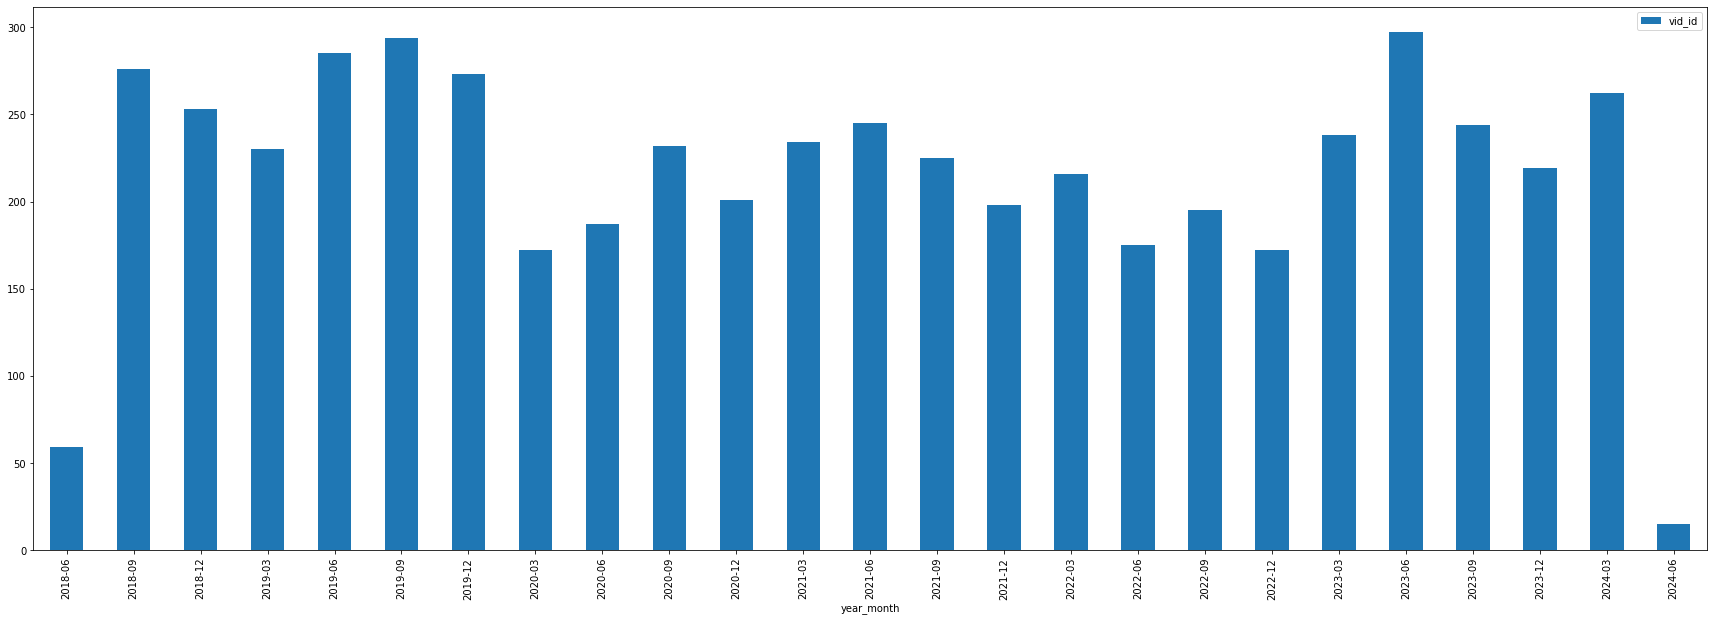

In [17]:
plot_frequency_of_mentions_year_month(company_name="Google", frequency='Q', figsize=(30,10))

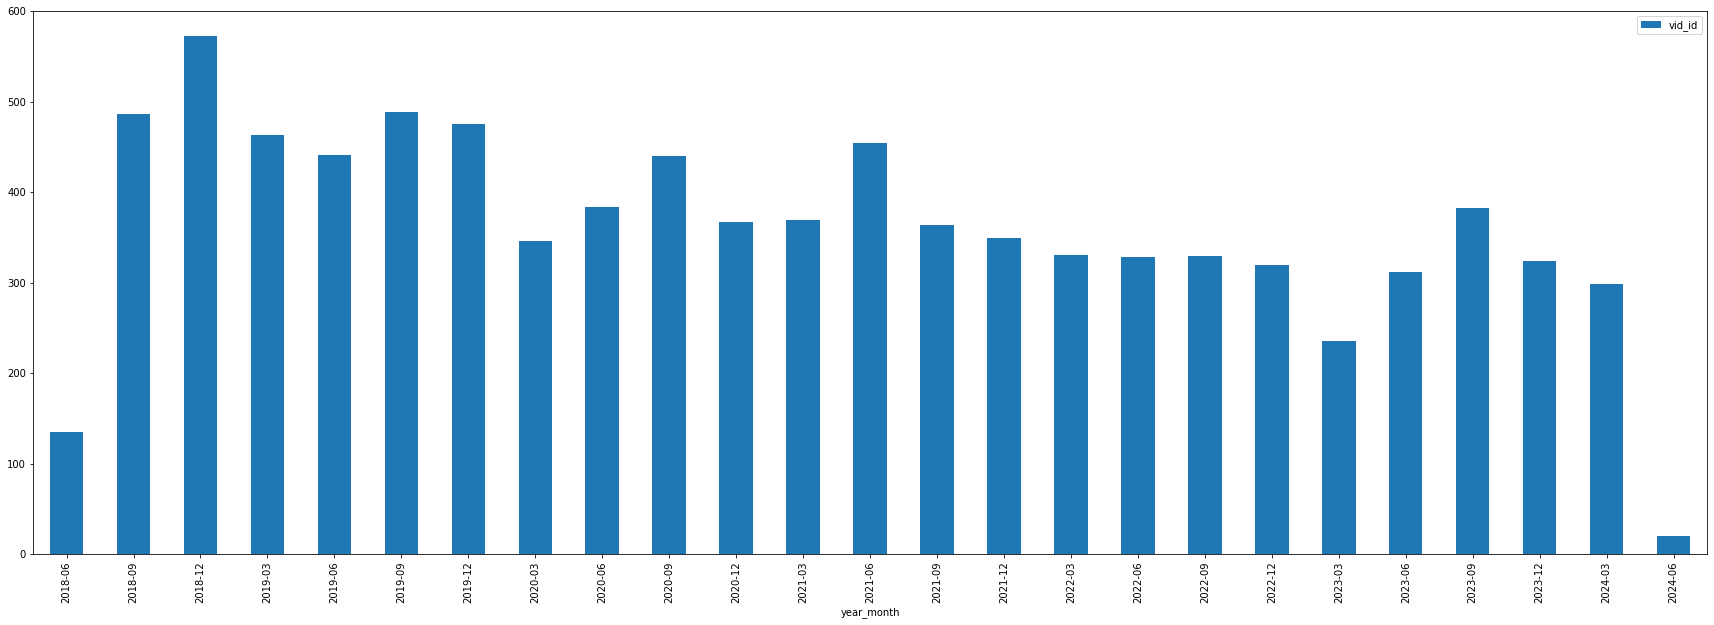

In [18]:
plot_frequency_of_mentions_year_month(company_name="Amazon", frequency='Q', figsize=(30,10))

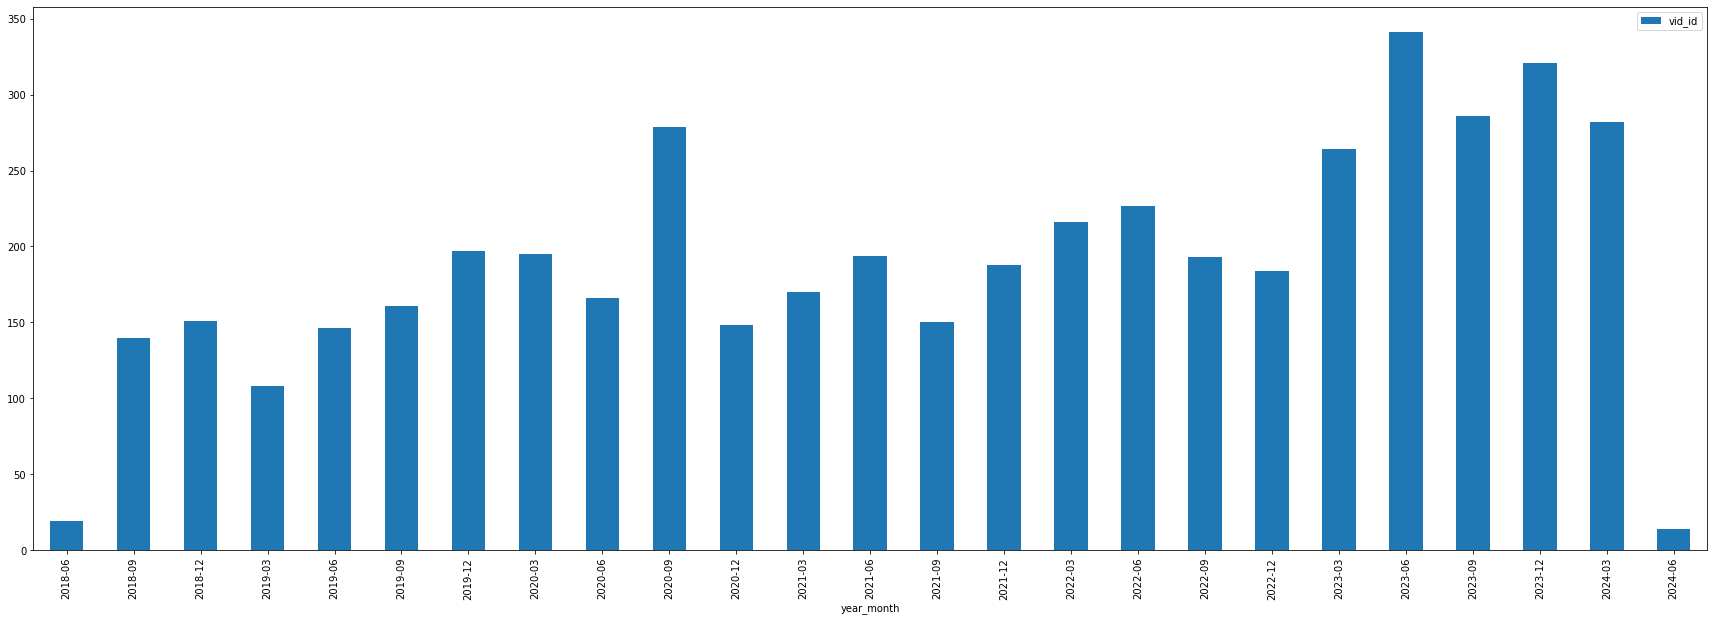

In [19]:
plot_frequency_of_mentions_year_month(company_name="Microsoft", frequency='Q', figsize=(30,10))

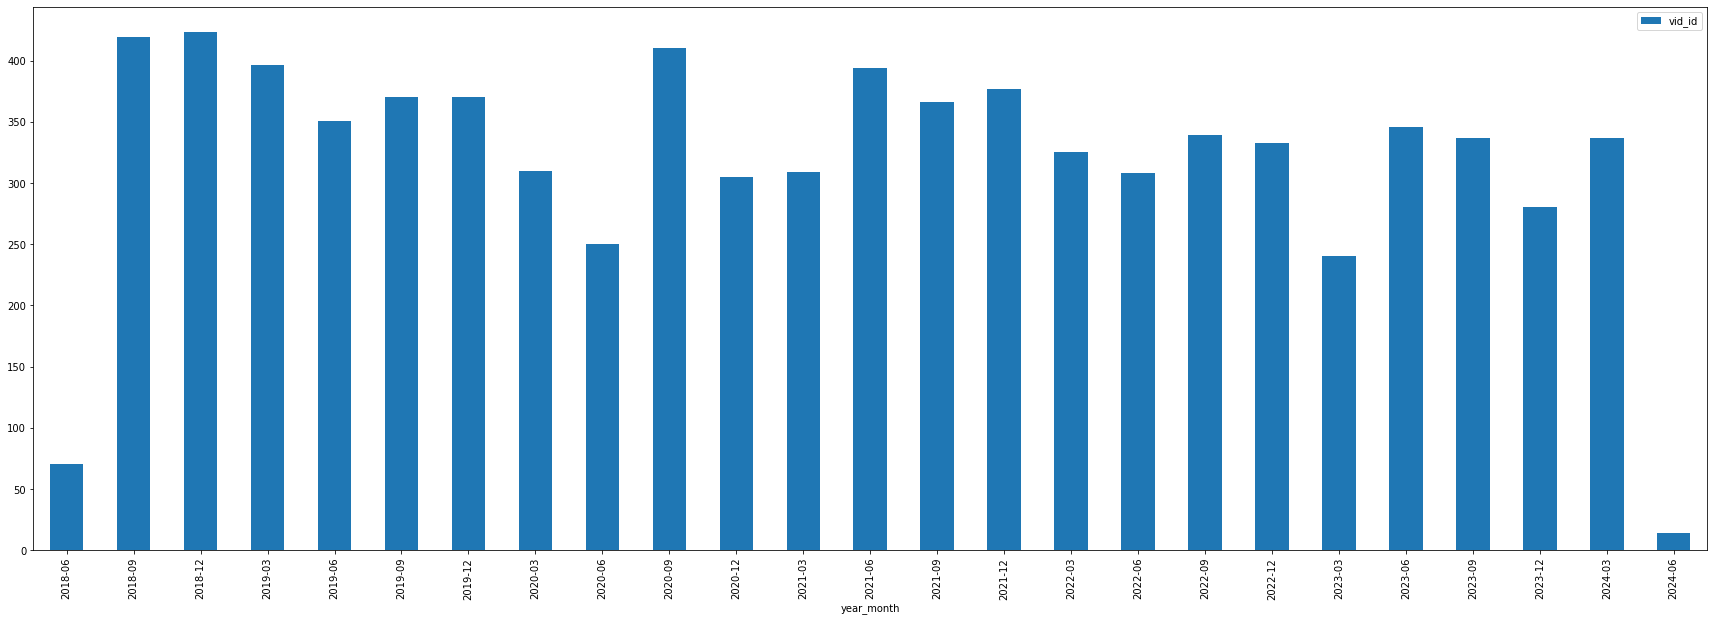

In [20]:
plot_frequency_of_mentions_year_month(company_name="Apple", frequency='Q', figsize=(30,10))